In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import VAR

In [2]:
#Data Importing

In [3]:
#global_active_power: The total active power consumed by the household (kilowatts).
#global_reactive_power: The total reactive power consumed by the household (kilowatts). voltage: Average voltage (volts).
#global_intensity: Average current intensity (amps).
#sub_metering_1: Active energy for kitchen (watt-hours of active energy).
#sub_metering_2: Active energy for laundry (watt-hours of active energy).
#sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

In [4]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'Timeframe' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, index_col='Timeframe')
df.head() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timeframe,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
#Data Pre-Processing

In [6]:
df['Timeframe'] = df.index

df['year'] = df['Timeframe'].apply(lambda x: x.year)
df['month'] = df['Timeframe'].apply(lambda x: x.month)
df['day'] = df['Timeframe'].apply(lambda x: x.day)
df["weekday"]= df.apply(lambda row: row["Timeframe"].weekday(),axis=1)

df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Timeframe,year,month,day,weekday
Timeframe,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00,2006,12,16,5
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00,2006,12,16,5
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00,2006,12,16,5
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00,2006,12,16,5
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00,2006,12,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0,2010-11-26 20:58:00,2010,11,26,4
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0,2010-11-26 20:59:00,2010,11,26,4
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0,2010-11-26 21:00:00,2010,11,26,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         float64       
 7   Timeframe              datetime64[ns]
 8   year                   int64         
 9   month                  int64         
 10  day                    int64         
 11  weekday                int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 205.8+ MB


In [8]:
# Count the number of null values
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
Timeframe                    0
year                         0
month                        0
day                          0
weekday                      0
dtype: int64

In [9]:
# Feature Modification
df.replace(['?', 'nan', np.nan], -1, inplace=True) 
numeric = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3','year','month']
for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Timeframe              datetime64[ns]
 8   year                   int64         
 9   month                  int64         
 10  day                    int64         
 11  weekday                int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 205.8 MB


In [11]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Timeframe                0
year                     0
month                    0
day                      0
weekday                  0
dtype: int64

In [12]:
#Exploratory Data Analysis

<AxesSubplot:ylabel='Global_active_power'>

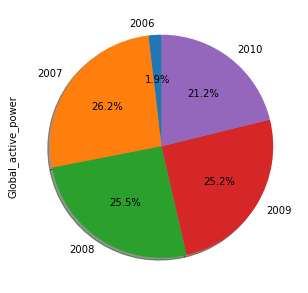

In [13]:
df.groupby(["year"])["Global_active_power"].sum().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,            
                            )

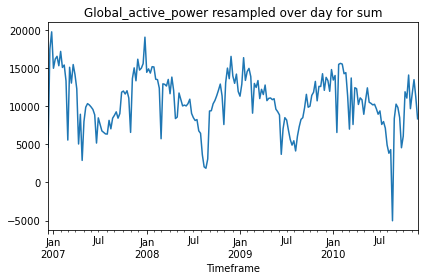

In [14]:
df.Global_active_power.resample('W').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()  

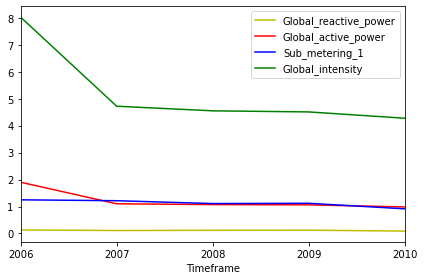

In [15]:
## resampling over day and computing mean
df.Global_reactive_power.resample('Y').mean().plot(color='y', legend=True)
df.Global_active_power.resample('Y').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('Y').mean().plot(color='b', legend=True)
df.Global_intensity.resample('Y').mean().plot(color='g', legend=True)
plt.tight_layout()
plt.show()

In [16]:
df["weekday"]= df.apply(lambda row: row["Timeframe"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)

C:\Users\welly\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\welly\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\welly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


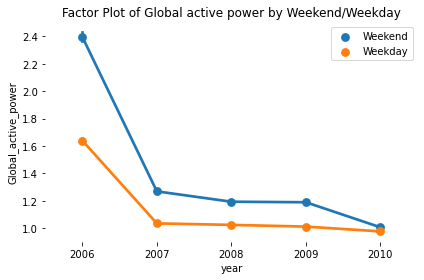

In [17]:
#Factor Plot of Global Active Power by Weekday vs. Weekend
dic={0:'Weekend',1:'Weekday'}
df['Day'] = df.weekday.map(dic)

df["Weekday"]=df.apply(lambda row: row["Timeframe"].weekday(),axis=1)
df["Weekday"] = (df["Weekday"] < 5).astype(int)

plt1=sns.factorplot('year','Global_active_power',hue='Day',
                    data=df, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Global active power by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

In [18]:
#Dataset Correlation

In [19]:
df2 = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [20]:
df2.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [21]:
df2 = df2.dropna(how = 'all')

In [22]:
df2.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [23]:
mean_consumption_resampled_mthly = df2.resample('M').mean()
model = VAR(mean_consumption_resampled_mthly)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=4)
model_fit.summary()

C:\Users\welly\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, May, 2021
Time:                     14:03:13
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -24.1326
Nobs:                     47.0000    HQIC:                  -25.5075
Log likelihood:           208.090    FPE:                3.73374e-12
AIC:                     -26.3370    Det(Omega_mle):     1.24248e-12
--------------------------------------------------------------------
Results for equation Global_active_power
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           11.774493        10.508005            1.121           0.262
L1.Global_active_power          15.665523         7.131483            2.197           0.028
L1

In [24]:
X = df2.iloc[:,[1,2,3,4,5,6]]
X.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,
2006-12-16 17:24:00,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,235.68,15.8,0.0,1.0,17.0


In [25]:
y = df2.iloc[:,0]
y.head()

dt
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.17552688  0.00445731  0.23803007 -0.00031731 -0.00044192  0.00217875]


In [27]:
predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ('R Squares value:',metrics.r2_score(y_test, predictions))

MAE: 0.025902546821812342
MSE: 0.0016528254258486124
RMSE: 0.04065495573541573
R Squares value: 0.99851567747378
